In [1]:
import pandas as pd
import os

os.chdir("/Users/christantoma/Downloads/Project Angka/")

df = pd.read_csv("jawabali.csv")

df.head()

,text,user_name,location
0,isssss https://t.co/6DCTSCLsrR,manestii,Bali
1,@prama_tee Wkwkwk,tjokagungray1,Bali
2,terima kasih ka siska \n.\ngrabfood\ngofood\ns...,ariexwind,Bali
3,@hurufterakhirZ Selamat berpuasa dan persiapan...,Kadek_Senox,Bali
4,"Hey!\nJangan hanya berpikir ""Semoga Tuhan memb...",Chondro_All_It,Bali


In [2]:
import re

df['text_processed'] = df['text'].map(lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x))
df['text_processed'] = df['text_processed'].map(lambda x: x.lower())
df['text_processed'].head() 

0                                             isssss  
1                                           tee wkwkwk
2    terima kasih ka siska    grabfood gofood shope...
3      selamat berpuasa dan persiapan untuk berbuka...
4    hey  jangan hanya berpikir  semoga tuhan memba...
Name: text_processed, dtype: object

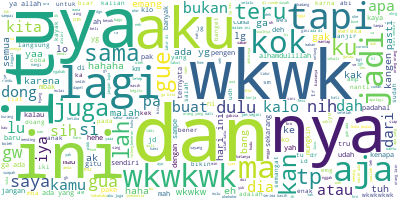

In [3]:
from wordcloud import WordCloud

long_string = ",".join(list(df["text_processed"].values))

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color="steelblue")
wordcloud.generate(long_string)
wordcloud.to_image()

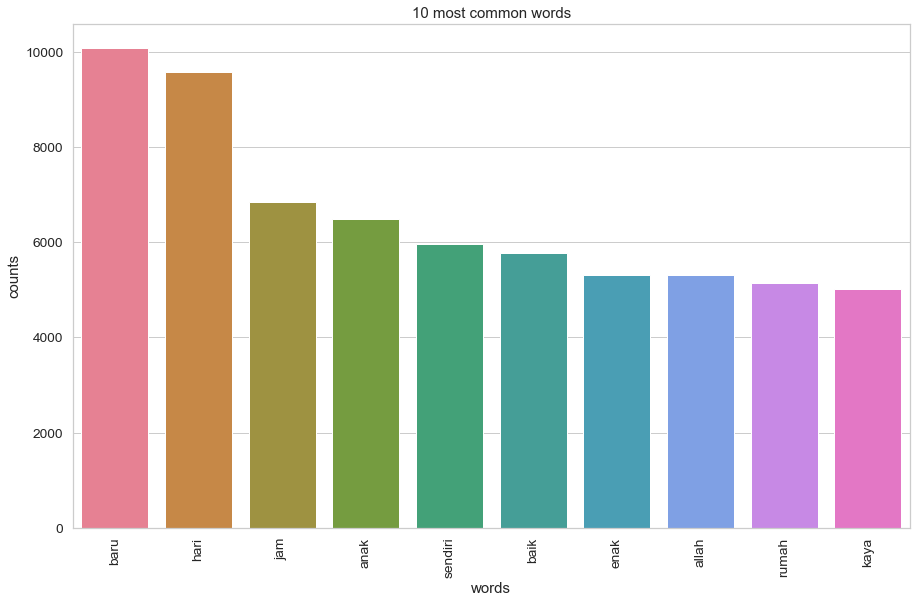

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
        
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
count_vectorizer = CountVectorizer(stop_words=["ama", "mesti", "nak", "jarang", "harusnya", "setuju", "mbah", "aw", "ngajak", "bagian", "sopo", "cc", "thanks", "more", "sorry", "memang", "cara", "piye", "asal", "mnfs", "gamau", "keliatan", "sa", "bantu", "abang", "only", "kaka", "maen", "nyari", "kk", "halo", "mikir", "ganti", "astaga", "waktunya", "nga", "beberapa", "iyaaa", "pd", "pingin", "ampun", "thank", "gada", "astagfirullah", "share", "ngasih", "tpi", "jika", "nunggu", "butuh", "shopeetanamthr10m", "lanjut", "yu", "sedikit", "koyo", "le", "sak", "pikir", "setiap", "selama", "melihat", "lha", "woy", "lur", "paham", "sejak", "aduh", "bayar", "maneh", "karna", "mari", "de", "kemana", "bos", "ngomong", "ketemu", "dlu", "anaknya", "bawa", "berapa", "masi", "kepikiran", "000", "rp", "dapet", "cukup", "tanya", "usah", "terjadi", "mo", "20", "mending", "na", "nu", "teu", "didi", "gtu", "naik", "heh", "sy", "tetep", "gausah", "fix", "kmu", "saling", "gemes", "heram", "aq", "bgst", "apapun", "wkwkkw", "nge", "ta", "kang", "dewe", "ngono", "ng", "meh", "ndak", "sia", "atas", "boong", "demi", "see", "was", "now", "se", "ye", "kayanya", "bilang", "lihat", "tenan", "kabeh", "hai", "amin", "pgn", "sayapercayajokowi", "kayaknya", "bismillah", "jawab", "apakah", "ketika", "tambah", "cari", "enggak", "balik", "hmmm", "al", "ntar", "as", "cok", "kena", "gapapa", "kebanyakan", "maksudnya", "nang", "ingat", "join", "go", "best", "will", "miss", "alhamdulillah", "segini", "bangun", "bro", "cuk", "why", "gas", "hah", "wkwkwkw", "akhirnya", "apaan", "beneran", "tok", "jan", "bagi", "sok", "sangat", "dek", "disini", "nanya", "huhu", "dikit", "aing", "ooo", "menjadi", "dasar", "kah", "rep", "world", "makanya", "iku", "gpp", "po", "ben", "sik", "ne", "ojo", "turu", "saiki", "terlalu", "kirain", "don", "pen", "too", "know", "kira", "aamiin", "yaudah", "iyo", "uwu", "keknya", "gmn", "iso", "dadi", "lho", "ono", "lek", "ngene", "wis", "kudu", "yok", "nder", "say", "duh", "dr", "ngapain", "semakin", "gaada", "anda", "sambil", "mirip", "tolong", "kenal", "dalam", "masak", "kasih", "terima", "mbak", "hmm", "mandi", "loh", "banyak", "ingin", "yaallah", "trs", "knp", "kayak", "nggak", "gatau", "wah", "gara", "jgn", "when", "wae", "wong", "sek", "ki", "koe", "karo", "kui", "seng", "neng", "an", "iki", "ra", "wes", "nek", "ae", "sing", "opo", "ora", "makasih", "lalu", "10", "mulu", "lewat", "from", "hehehe", "hyung", "gabisa", "yo", "namanya", "let", "gk", "jalan", "mungkin", "please", "yak", "tiba", "kadang", "blm", "kata", "minta", "twitter", "anjir", "kapan", "kami", "mereka", "hanya", "by", "he", "or", "paling", "dimana", "mantap", "rasanya", "iyaa", "gais", "sekali", "make", "tadi", "engga", "at", "id", "open", "km", "doang", "baca", "sering", "saat", "malah", "makin", "langsung", "ikut", "pak", "tak", "siapa", "2020", "om", "wkwkwkwk", "all", "oke", "what", "one", "ok", "sini", "ka", "twt", "do", "but", "can", "not", "your", "and", "my", "haha", "this", "so", "be", "like", "we", "dengan", "kenapa", "atau", "kyk", "nanti", "anjing", "hassan", "doi", "with", "oh", "ente", "bener", "salah", "jg", "bozz", "lupa", "lain", "in", "of", "ngakak", "cek", "nonton", "masuk", "kangen", "gt", "fess", "yah", "it", "trus", "bu", "tetap", "rw", "tiap", "padahal", "yes", "yaaa", "selalu", "sampai", "just", "yuk", "mak", "kaga", "sm", "ah", "depan", "hehe", "mu", "via", "lam", "knl", "dianggap", "nah", "wa", "bar", "abis", "yuk", "ak", "selalu", "liat", "wkw", "wkwkw", "sekarang", "amp", "me", "dm", "klo","mas", "belum", "hahaha", "eh", "coba", "seperti", "harus", "dah", "punya", "kau", "masa", "semoga", "bukan", "buka", "gini", "min", "ih", "berasa", "mba", "kek", "begitu", "adalah", "bapak", "inget", "begini", "cuma", "gini", "emg", "belom", "dumb", "beli", "lari", "ayo", "kalian", "coba", "main", "ngerti", "susun", "kali", "boleh", "punya", "kek", "deh", "pasti", "ternyata", "ku", "karena", "ngga", "on", "besok", "tidur", "amat", "ko", "perlu", "ha", "33", "kak", "ga", "kalo", "gak", "bisa", "aja", "nya", "kalau", "mau", "jadi", "gue", "sih", "dong", "gua", "bgt", "ci", "yaa", "pas", "suka", "jd", "udh", "gw", "tau", "dari", "bgt", "tuh", "wkwk", "org", "wkwkwk", "mana", "gue", "ikutan", "kuy", "semua", "up", "pada", "akan", "lu", "emang", "untuk", "hahahaha", "lyanafelicity88", "kan", "makan", "banget", "mengirim", "saja", "udah", "nih", "apa", "bang", "for", "terus", "03", "dan", "is", "tau", "gw", "lo", "masih", "bikin", "you", "lebih", "lah", "mah", "iya", "gitu", "jangan", "lagi", "orang", "kamu", "buat", "dia", "dulu", "sampe", "sudah", "tidak", "pengen", "pernah", "kita", "saya", "si", "kamu", "kok", "lu", "pake", "gimana", "udah", "juga", "bgt", "sih", "jadi", "sama", "nya", "dari", "tp", "aja", "kalo", "apa", "is", "lg", "biar", "rt", "https", "tco", "yang", "aku", "yg", "dan", "di", "ini", "ada", "tapi", "ni", "itu", "ya", "no", "24", "kuala", "pilah", "tu", "la", "the", "ke", "nk", "hatch", "to", "are", "that", "have"])
count_data = count_vectorizer.fit_transform(df['text_processed'])
plot_10_most_common_words(count_data, count_vectorizer)

In [21]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from sklearn.decomposition import LatentDirichletAllocation as LDA
 
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
number_topics = 25
number_words = 10

lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
baru foto maap kesel tugas heran sma hujan nama ilang

Topic #1:
sendiri diri sabar sadar untung manusia berarti seru kucing mimpi

Topic #2:
covid 19 biasa hidup rindu anak luar cocok kaget kembali

Topic #3:
info sehat isi ibu ready nikah bandung slot bo rr

Topic #4:
enak lebaran keren baju bali aman kepala berani nemu serem

Topic #5:
bagus cantik seneng negara dirumahaja dikasih nyanyi jahat beb warna

Topic #6:
tahun pagi rame bosen episode ulang jawaban ati 14 plis

Topic #7:
satu belajar capek ngantuk marah kakak uang mudik done rebahan

Topic #8:
penting lucu adek tua pindah jiwa polisi anak maunya jkt48

Topic #9:
kuat asli ig akun muka story waktu jogja kalah tante

Topic #10:
beda teh corona hp parah kopi goblok mood nyaman pie

Topic #11:
sakit males kasian auto cewek follow bentar atuh sedang cowok

Topic #12:
siap manis perasaan betul jaga mutualan denger mcd mei tentang

Topic #13:
pertama jelas pemerintah malu tenang drama semuanya amby